<a href="https://colab.research.google.com/github/Malu2810/-Improving-vessel-performance-using-deep-learning/blob/main/weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
weather_df=pd.read_csv('/content/weather.zip')
weather_df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
weather_df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [ ]:
weather_df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [ ]:
weather_df.duplicated().sum()

0

In [ ]:
weather_df[weather_df['temp_min']==min(weather_df.temp_min)]

,date,precipitation,temp_max,temp_min,wind,weather
706,2013-12-07,0.0,0.0,-7.1,3.1,sun


In [ ]:
weather_df[weather_df['temp_max']==max(weather_df.temp_max)]

,date,precipitation,temp_max,temp_min,wind,weather
953,2014-08-11,0.5,35.6,17.8,2.6,rain


<Axes: xlabel='temp_max', ylabel='Count'>

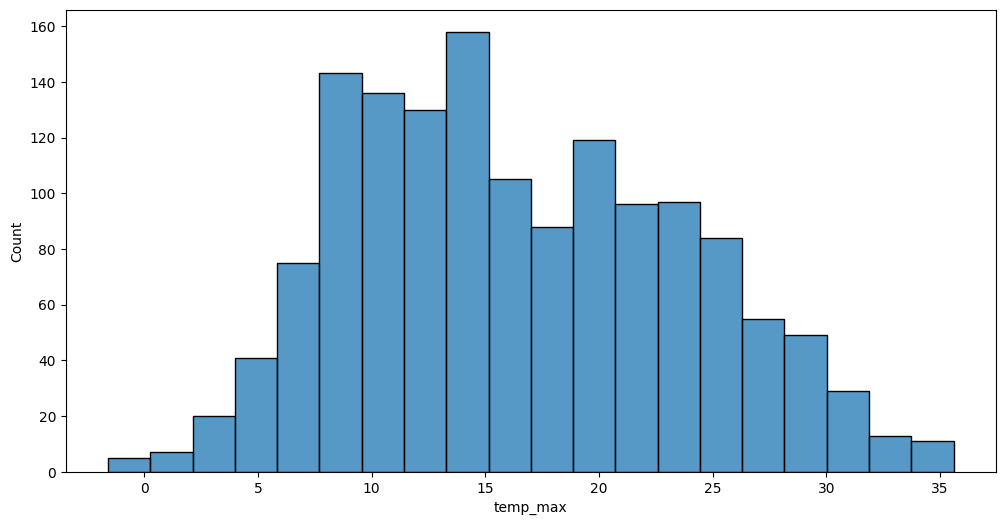

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=weather_df,x=weather.temp_max,bins=20)

<Axes: xlabel='temp_min', ylabel='Count'>

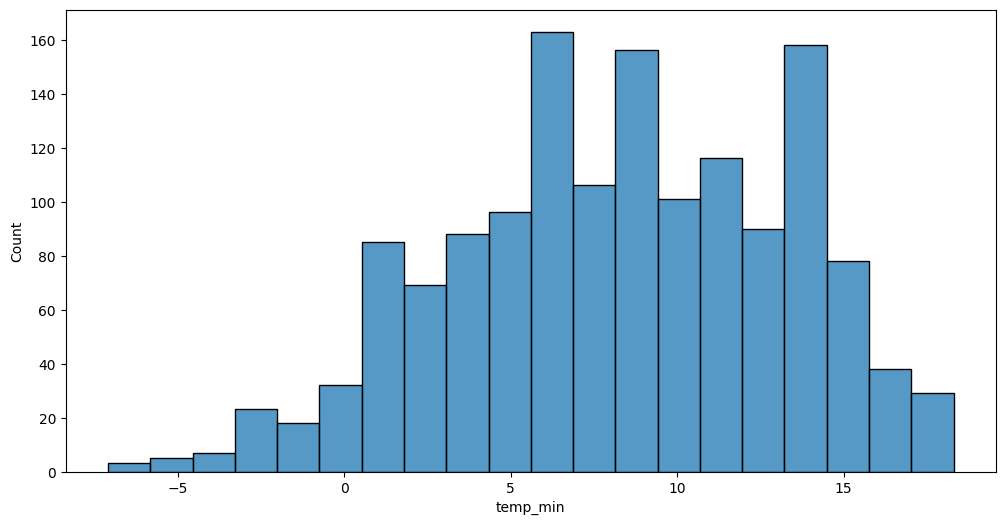

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=weather_df,x=weather.temp_min,bins=20)

In [ ]:

weather_df.loc[:,['date','temp_max']]
weather_df['date'] = pd.to_datetime(weather_df['date'])

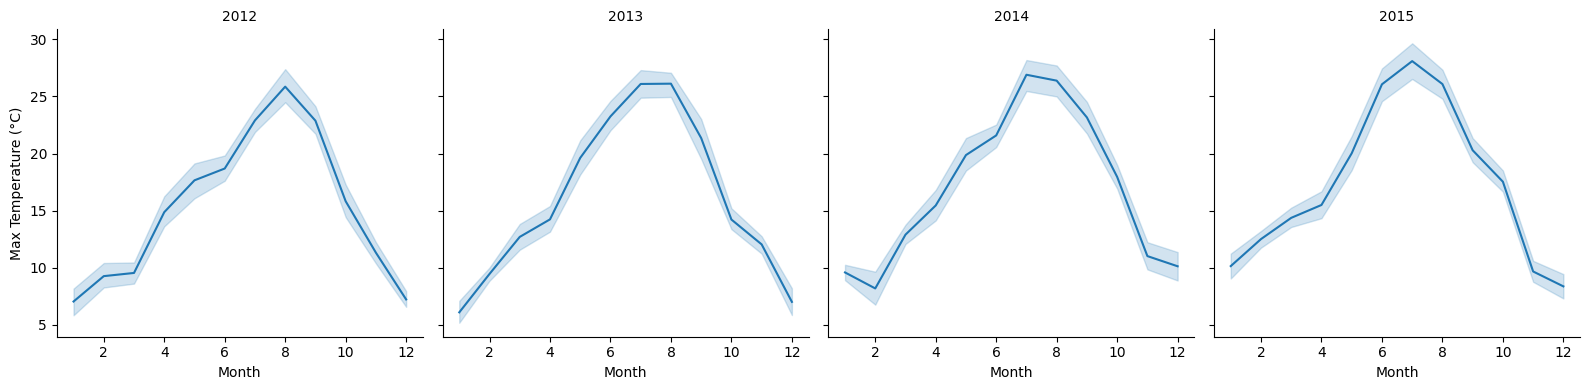

In [ ]:
#Max temperature in each month in each year
weather_df['year'] = weather_df['date'].dt.year
weather_df['month'] = weather_df['date'].dt.month
g = sns.FacetGrid(weather_df, col='year', col_wrap=4, height=4)
g.map(sns.lineplot, 'month', 'temp_max')
g.set_axis_labels('Month', 'Max Temperature (°C)')
g.set_titles(col_template="{col_name}")
plt.show()

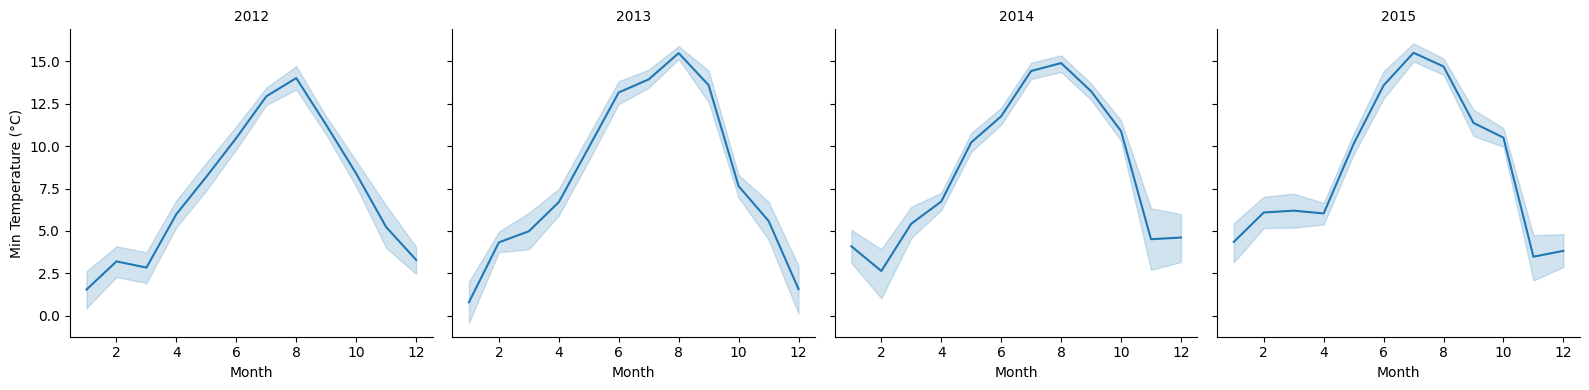

In [ ]:
#Min temperature in each month in each year
g = sns.FacetGrid(weather_df, col='year', col_wrap=4, height=4)
g.map(sns.lineplot, 'month', 'temp_min')
g.set_axis_labels('Month', 'Min Temperature (°C)')
g.set_titles(col_template="{col_name}")
plt.show()

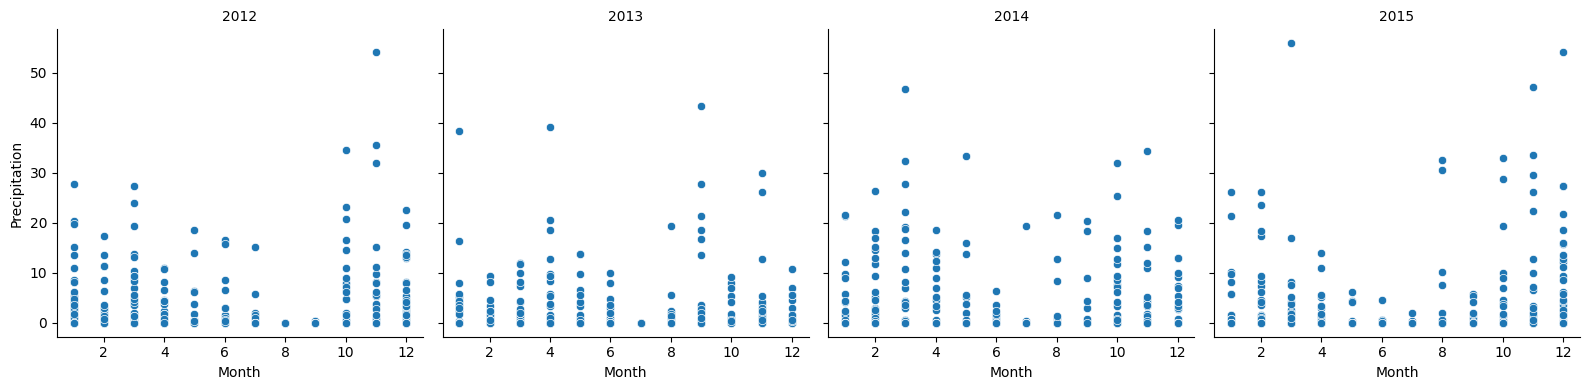

In [ ]:
#Precipitation in each month in each year
g = sns.FacetGrid(weather_df, col='year', col_wrap=4, height=4)
g.map(sns.scatterplot, 'month', 'precipitation')
g.set_axis_labels('Month', 'Precipitation')
g.set_titles(col_template="{col_name}")
plt.show()

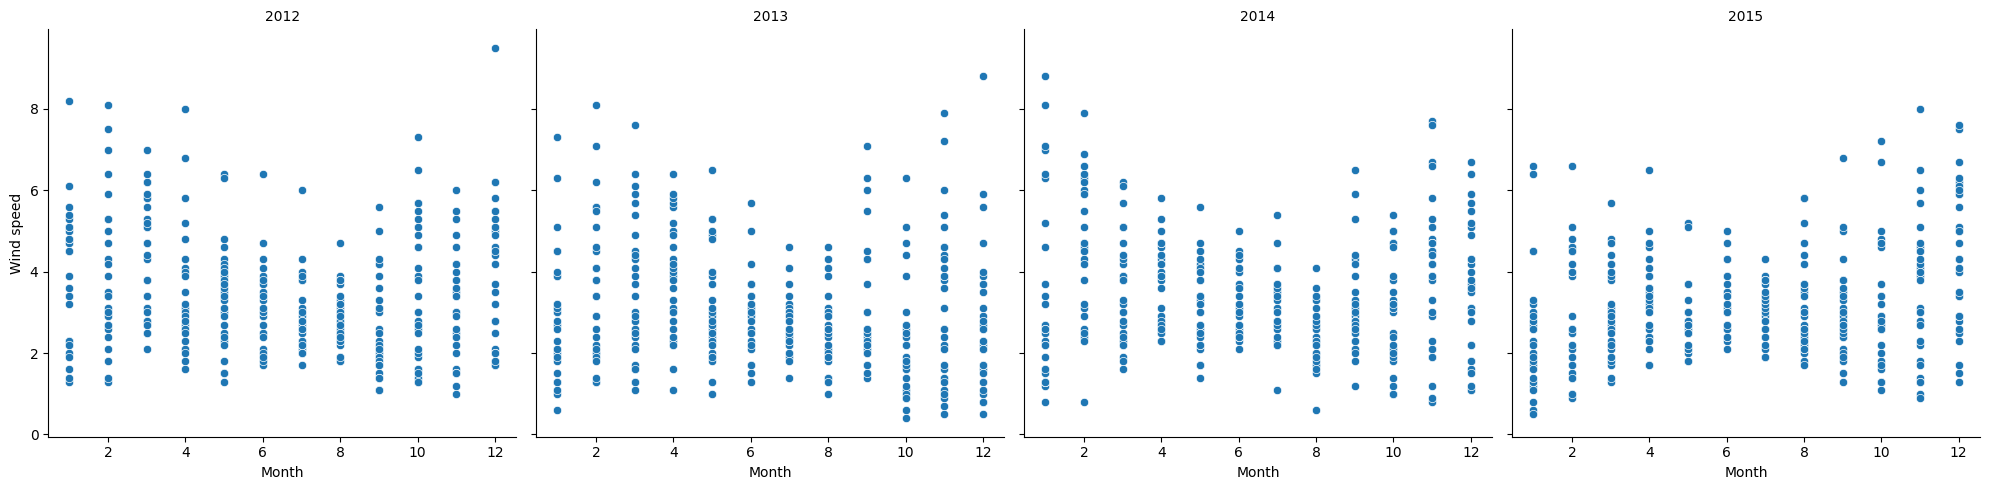

In [ ]:
g = sns.FacetGrid(weather_df, col='year', col_wrap=4, height=5)
g.map(sns.scatterplot, 'month', 'wind')
g.set_axis_labels('Month', 'Wind speed')
g.set_titles(col_template="{col_name}")
plt.show()

In [ ]:
weather_df.weather.value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

<Axes: xlabel='weather', ylabel='count'>

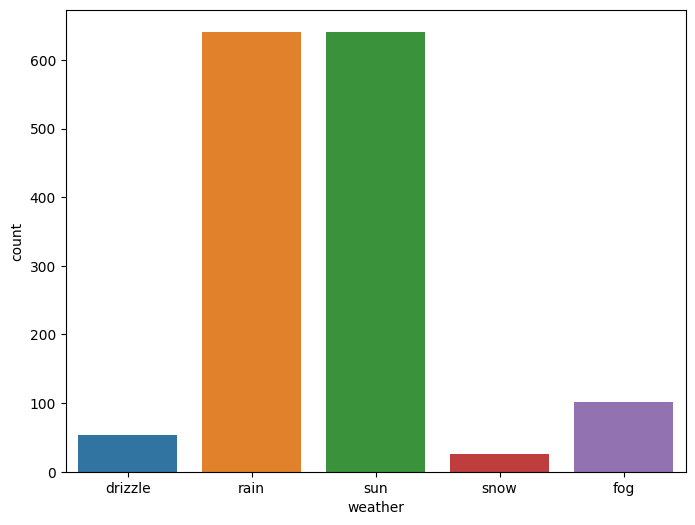

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=weather_df,x=weather_df.weather)

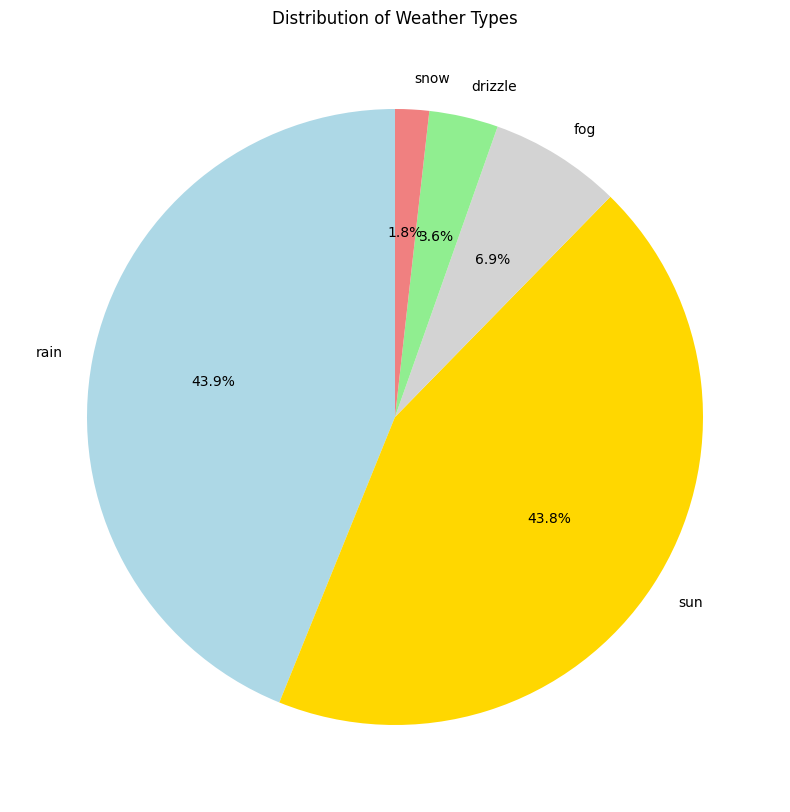

In [ ]:
x=weather_df.weather.value_counts()
plt.figure(figsize=(12, 10))
plt.pie(x, labels=x.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'gold', 'lightgray', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Weather Types')
plt.show()

In [ ]:
weather_df.drop('month',axis=1,inplace=True)
weather_df.drop('year',axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
weather_df['weather']=le.fit_transform(weather_df['weather'])

In [ ]:
#GAUSSIANNB MODEL
x = weather_df[['temp_min', 'temp_max', 'precipitation', 'wind']]
y=weather_df['weather']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=1)

print("GaussianNB Accuracy:{:.2f}%".format(nb_model.score(X_test,y_test)*100))

GaussianNB Accuracy:82.94%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re
import missingno as mso
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier




In [ ]:
#KNN MODEL
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
print("KNN Accuracy:{:.2f}%".format(knn.score(X_test,y_test)*100))

KNN Accuracy:77.82%


In [ ]:
#LOGISTIC REGRESSION MODEL
# Model training
lr = LogisticRegression()
lr.fit(X_train,y_train)
# Model evaluation
y_pred_lr = lr.predict(X_test)
print('LogReg Accuracy = {:.2f}'.format(lr.score(X_test,y_test)*100))

LogReg Accuracy = 83.28


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#GRADIENT BOOSTING
# Model training
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

# Model evaluation
accuracy = gbc.score(X_test, y_test)
print("Gradient Boosting Accuracy: {:.2f}%".format(accuracy * 100))

Gradient Boosting Accuracy: 81.57%


In [ ]:
#RANDOM FOREST
rf = RandomForestClassifier(bootstrap=False)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print('RandFor Accuracy = {:.2f}'.format(rf.score(X_test,y_test)*100))

RandFor Accuracy = 80.20


In [ ]:
#DECISION TREE
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
print('DT Accuracy = {:.2f}'.format(dt.score(X_test,y_test)*100))

DT Accuracy = 74.40


In [ ]:
print("GaussianNB Accuracy:{:.2f}%".format(nb_model.score(X_test,y_test)*100))

print("KNN Accuracy:{:.2f}%".format(knn.score(X_test,y_test)*100))

print('LogReg Accuracy = {:.2f}'.format(lr.score(X_test,y_test)*100))

print("Gradient Boosting Accuracy: {:.2f}%".format(accuracy * 100))

print('RandFor Accuracy = {:.2f}'.format(rf.score(X_test,y_test)*100))

print('DT Accuracy = {:.2f}'.format(dt.score(X_test,y_test)*100))

GaussianNB Accuracy:82.94%
KNN Accuracy:77.82%
LogReg Accuracy = 83.28
Gradient Boosting Accuracy: 82.94%
RandFor Accuracy = 80.20
DT Accuracy = 74.40
